In [1]:
import sys
sys.path.append("/home/ly/workspace/mmsa")
seed = 1938
import numpy as np
import torch
from torch import nn
from torch import optim

np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
from models.mvsa_vistanet import *
from utils.train import *
from typing import *
from utils.load_mvsa import *
from utils.dataset import *
from utils.train import *
from utils.train import *

config

{'task': 'CLS',
 'embedding_dim': 25,
 'embedding': None,
 'freeze_embedding': False,
 'word_hidden_size': 25,
 'word_layers': 1,
 'uniform_bound': 0.1,
 'sentence_hidden_size': 25,
 'sentence_layers': 1,
 'img_input_size': 4096,
 'visual_attention_size': 100,
 'dropout': 0.5,
 'output_size': 3,
 'bias_init': 1.0}

In [3]:
%%time

batch_size = 64
workers = 4
train_set, valid_set, test_set= load_glove_data(config)
train_loader, valid_loader, test_loader = get_loader(batch_size, workers, get_collate_fn(config), train_set, valid_set, test_set)
model = Model(config).cuda()
loss = nn.CrossEntropyLoss()
print(get_parameter_number(model))

_interval = 5
lr = 1e-3
epoches = 50
stoping_step = 5
optimizer = get_regal_optimizer(model, optim.AdamW, lr)

viz = get_Visdom()
batch_loss_drawer = VisdomScalar(viz, f"batch_loss interval:{_interval}")
epoch_loss_drawer = VisdomScalar(viz, f"Train and valid loss", 2)
acc_drawer = VisdomScalar(viz, "Train and valid accuracy", 2)
text_writer = VisdomTextWriter(viz, "Training")

batch_loss = []
train_loss = []
valid_loss = []
train_acc = []
valid_acc = []

res, model = train_visdom_v2(model, optimizer, loss, viz, train_loader,
                          valid_loader, epoches, batch_loss, batch_loss_drawer,
                          train_loss, valid_loss, epoch_loss_drawer,
                          train_acc, valid_acc, acc_drawer, text_writer,
                         _interval=_interval, early_stop=stoping_step)
eval_model(model, test_loader, loss)

/home/ly/miniconda3/envs/torch1.7/lib/python3.8/site-packages/torch/nn/modules/rnn.py:58: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
Setting up a new session...


{'Total': 546878, 'Trainable': 546878}


No 1 epoch: 119it [00:06, 18.13it/s]
No 2 epoch: 119it [00:06, 18.38it/s]
No 3 epoch: 119it [00:06, 18.24it/s]
No 4 epoch: 119it [00:06, 18.38it/s]
No 5 epoch: 119it [00:06, 17.65it/s]
No 6 epoch: 119it [00:06, 17.04it/s]
No 7 epoch: 119it [00:06, 17.86it/s]
No 8 epoch: 119it [00:06, 17.38it/s]
No 9 epoch: 119it [00:06, 18.23it/s]
/home/ly/miniconda3/envs/torch1.7/lib/python3.8/site-packages/torch/nn/modules/rnn.py:742: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at  /opt/conda/conda-bld/pytorch_1603729096996/work/aten/src/ATen/native/cudnn/RNN.cpp:775.)
  result = _VF.gru(input, batch_sizes, hx, self._flat_weights, self.bias,


CPU times: user 1min 1s, sys: 5.82 s, total: 1min 7s
Wall time: 1min 29s


((0.6523979389615537, 0.6071680238695029), 0.7168922543620194)

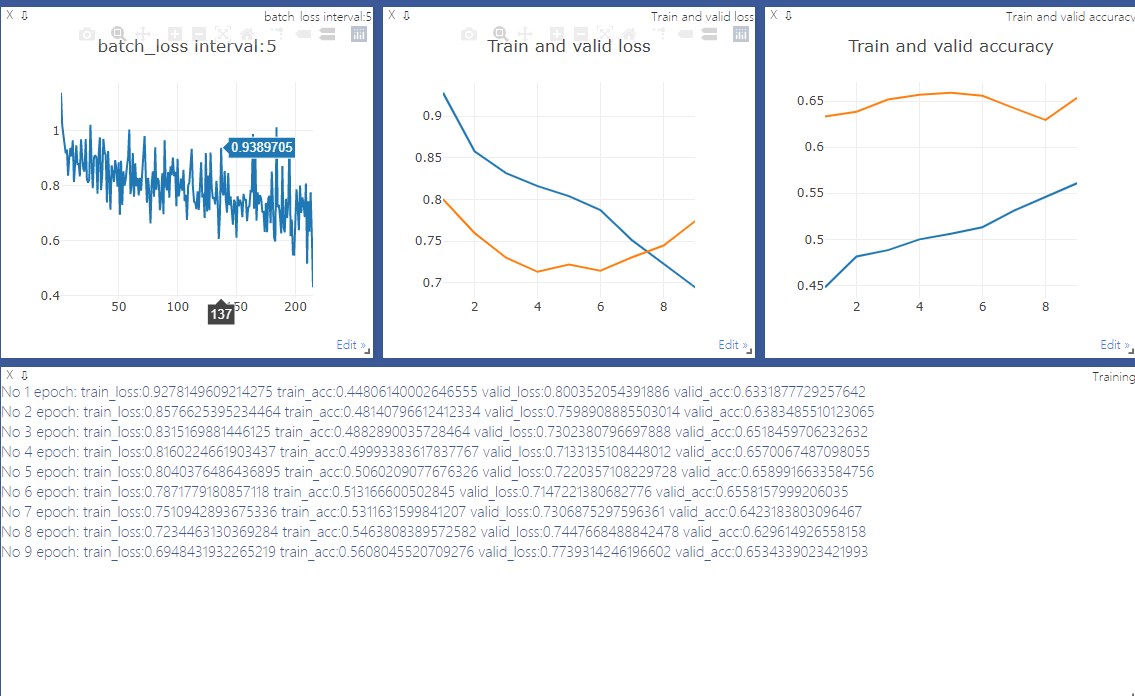

In [6]:
torch.version

<module 'torch.version' from '/home/ly/miniconda3/envs/torch1.7/lib/python3.8/site-packages/torch/version.py'>

In [2]:
# 
config["embedding_dim"] = 50
config["word_hidden_size"] = 100
config["sentence_hidden_size"] = 100
config

{'task': 'CLS',
 'embedding_dim': 50,
 'embedding': None,
 'freeze_embedding': False,
 'word_hidden_size': 100,
 'word_layers': 1,
 'uniform_bound': 0.1,
 'sentence_hidden_size': 100,
 'sentence_layers': 1,
 'img_input_size': 4096,
 'visual_attention_size': 100,
 'dropout': 0.5,
 'output_size': 3,
 'bias_init': 1.0}

In [3]:
%%time

batch_size = 64
workers = 4
train_set, valid_set, test_set= load_glove_data(config)
train_loader, valid_loader, test_loader = get_loader(batch_size, workers, get_collate_fn(config), train_set, valid_set, test_set)
model = Model(config).cuda()
loss = nn.CrossEntropyLoss()
print(get_parameter_number(model))

_interval = 5
lr = 1e-3
epoches = 50
stoping_step = 5
optimizer = get_regal_optimizer(model, optim.AdamW, lr)

viz = get_Visdom()
batch_loss_drawer = VisdomScalar(viz, f"batch_loss interval:{_interval}")
epoch_loss_drawer = VisdomScalar(viz, f"Train and valid loss", 2)
acc_drawer = VisdomScalar(viz, "Train and valid accuracy", 2)
text_writer = VisdomTextWriter(viz, "Training")

batch_loss = []
train_loss = []
valid_loss = []
train_acc = []
valid_acc = []

res, model = train_visdom_v2(model, optimizer, loss, viz, train_loader,
                          valid_loader, epoches, batch_loss, batch_loss_drawer,
                          train_loss, valid_loss, epoch_loss_drawer,
                          train_acc, valid_acc, acc_drawer, text_writer,
                         _interval=_interval, early_stop=stoping_step)
eval_model(model, test_loader, loss)

/home/ly/miniconda3/envs/torch1.7/lib/python3.8/site-packages/torch/nn/modules/rnn.py:58: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
Setting up a new session...


{'Total': 1843053, 'Trainable': 1843053}


No 1 epoch: 119it [00:06, 18.48it/s]
No 2 epoch: 119it [00:06, 17.98it/s]
No 3 epoch: 119it [00:06, 18.54it/s]
No 4 epoch: 119it [00:06, 17.83it/s]
No 5 epoch: 119it [00:06, 18.86it/s]
No 6 epoch: 119it [00:06, 18.06it/s]
No 7 epoch: 119it [00:06, 17.66it/s]
No 8 epoch: 119it [00:06, 18.52it/s]
No 9 epoch: 119it [00:06, 17.73it/s]
/home/ly/miniconda3/envs/torch1.7/lib/python3.8/site-packages/torch/nn/modules/rnn.py:742: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at  /opt/conda/conda-bld/pytorch_1603729096996/work/aten/src/ATen/native/cudnn/RNN.cpp:775.)
  result = _VF.gru(input, batch_sizes, hx, self._flat_weights, self.bias,


CPU times: user 1min 1s, sys: 5.62 s, total: 1min 6s
Wall time: 1min 14s


((0.6666666666666666, 0.6497455707641214), 0.6991680463155111)